# Artificial Neural Network For Multi-Classification - Python Implementation 

Abdelrahman Ibrahim Yassin Ahmad

1902394@eng.asu.edu.eg

### General steps for a classification problem:
1. Importing Necessary Libraries
2. Read, analyze and visualize the dataset
3. Define helper functions
4. Prepare the dataset for training
5. Build neural network model
6. Train and plot the accuracy of the model

**1. Importing Necessary Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

**2. Read, analyze and visualize the dataset**

In [ ]:
data = pd.read_csv('winequality-red.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Our dataset contain **1559** data samples and **12** columns/features with numerical float values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d70c82ed0>,
      dtype=object)

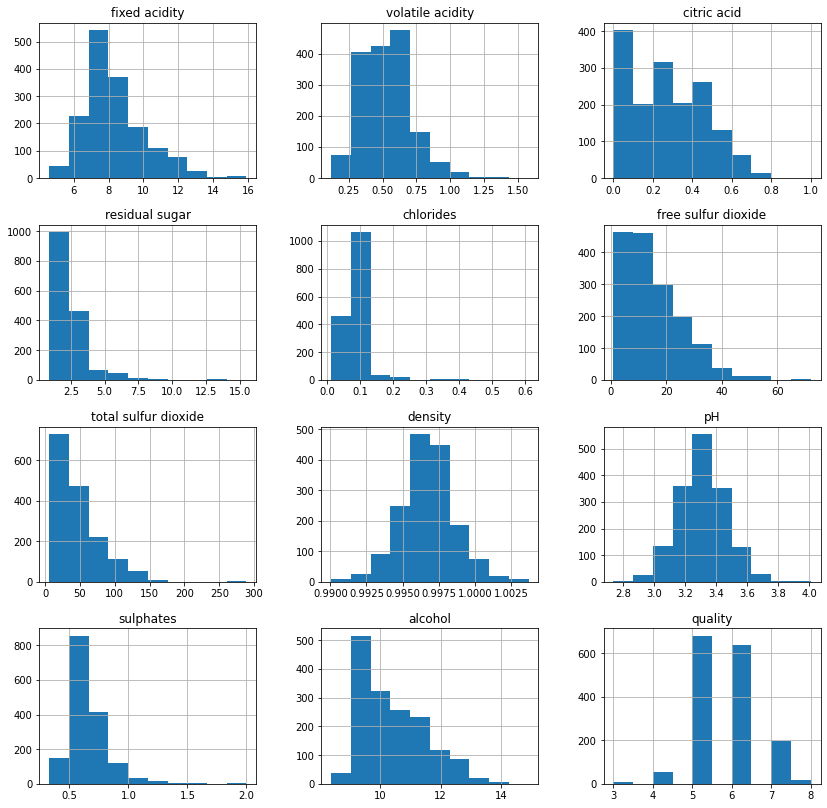

In [ ]:
data.hist(figsize=(14,14))

The target feature is ***quality*** and it has 6 discrete values {3,4,5,6,7,8}

**3. Define helper functions**

**shuffle_split_data** function which split the dataset into training and testing sets according to defined split ratio

In [ ]:
def shuffle_split_data(X, y, ratio):
    arr_rand = np.random.rand(X.shape[0])
    split = arr_rand < np.percentile(arr_rand, ratio)
    #split = np.random.choice(range(X.shape[0]), int((ratio/100)*X.shape[0]))
    X_train = X[~split]
    y_train = y[~split]
    X_test =  X[split]
    y_test = y[split]

    #print (len(X_train), len(y_train), len(X_test), len(y_test))
    return X_train, y_train, X_test, y_test

**encode_and_bind** function which apply One Hot encoding on the target feature

In [ ]:
def one_hot_encode(array):
    """Convert an iterable of indices to one-hot encoded labels."""
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

**standardize** function which normalize the data by subtracting the mean and dividing by the 
stdev for each feature and each sample

In [ ]:
def standardize(data):
    #Compute the mean
    data_mean = data.sum(axis=0)/data.shape[0]
    #Compute the standard deviation
    data_std = np.std(data, axis=0, dtype=np.float64)
    #Standardize the data
    data_standard = (data - data_mean)/data_std
    
    return data_standard

**4. Prepare the dataset for training**

Check  duplicates

In [ ]:
duplicates = data[data.duplicated(keep=False)]
duplicates = duplicates.sort_values(by=['quality'], ascending= False)
duplicates.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
498,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
495,10.7,0.35,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
290,8.7,0.52,0.09,2.50,0.091,20.0,49.0,0.99760,3.34,0.86,10.6,7
1002,9.1,0.29,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
997,5.6,0.66,0.00,2.20,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7


In [ ]:
print("There is {} duplicated points in dataset".format(data.duplicated().sum()))

There is 240 duplicated points in dataset




We have to get rid of dublicates as they dont contribute in our prediction .


In [ ]:
data.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(data.shape[0], data.shape[1]))

Total 1359 datapoints remaining with 12 features


In [ ]:
columns = list(data.columns.values)

labels = data[columns[-1:]]
labels = np.array(labels, dtype='int64')
features = data[columns[0:-1]]
features = np.array(features, dtype='float64')

Use describe() function to show the statistics of each feature.

In [ ]:
dataset = pd.DataFrame({'fixed acidity': features[:, 0], 'volatile acidity': features[:, 1], 'citric acid': features[:, 2]
                        , 'residual sugar': features[:, 3], 'chlorides': features[:, 4], 'free sulfur dioxide': features[:, 5]
                       , 'total sulfur dioxide': features[:, 6], 'density': features[:, 7], 'pH': features[:, 8]
                       , 'sulphates': features[:, 9], 'alcohol': features[:, 10]})
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Let's standardize the dataset (making the mean of each feature =0 and the std = 1)



In [ ]:
features_standardize = standardize(features)

In [ ]:
dataset_standardize = pd.DataFrame({'fixed acidity': features_standardize[:, 0], 'volatile acidity': features_standardize[:, 1]
                        , 'citric acid': features_standardize[:, 2], 'residual sugar': features_standardize[:, 3]
                        , 'chlorides': features_standardize[:, 4], 'free sulfur dioxide': features_standardize[:, 5]
                       , 'total sulfur dioxide': features_standardize[:, 6], 'density': features_standardize[:, 7]
                        , 'pH': features_standardize[:, 8], 'sulphates': features_standardize[:, 9]
                        , 'alcohol': features_standardize[:, 10]})
dataset_standardize.describe().round(decimals=4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.0000,1359.0000,1359.0000,1359.0000,1359.0000,1359.0000,1359.0000,1359.0000,1359.0000,1359.0000,1359.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004,1.0004
min,-2.1370,-2.2380,-1.3933,-1.2009,-1.5423,-1.4261,-1.2225,-3.5536,-3.6765,-1.9267,-1.8789
25%,-0.6972,-0.7623,-0.9328,-0.4612,-0.3672,-0.8516,-0.7434,-0.5936,-0.6439,-0.6372,-0.8619
50%,-0.2365,-0.0518,-0.0631,-0.2392,-0.1848,-0.1813,-0.2643,-0.0048,0.0014,-0.2269,-0.2148
75%,0.5122,0.6041,0.8066,0.0567,0.0583,0.4890,0.4843,0.5947,0.5821,0.4179,0.6173
max,4.3709,5.7417,3.7228,9.5994,10.5934,5.3724,7.2514,3.7367,4.5181,7.8620,4.1304


Append another column of ones to the feature space which maps adding the bias

In [ ]:
features_final = np.c_[ features_standardize, np.ones(features_standardize.shape[0]) ]

One Hot encode the target feature ***labels***

In [ ]:
labels_final = one_hot_encode(labels)

In [ ]:
#test the label array after applying hot encoding
labels_final[0]

array([0., 0., 1., 0., 0., 0.])

Splitting the data to training and testing sets

In [ ]:
X_train, y_train, X_test, y_test = shuffle_split_data(features_final, labels_final, 50)

In [ ]:
print("Training Set shape: " + str(X_train.shape))
print("Testing Set shape: " + str(X_test.shape))

Training Set shape: (680, 12)
Testing Set shape: (679, 12)


**5. Build neural network model**
#### General steps to build neural network:
1. Define the neural network structure ( # of input units,  # of hidden units, etc)
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation
    - Compute loss
    - Implement backward propagation to get the gradients
    - Update parameters


In [ ]:
class ANN:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = [] 

    def relu(self,Z):
        '''
        The ReLu activation function is to performs a threshold
        operation to each input element where values less 
        than zero are set to zero.
        '''
        return np.maximum(0,Z)

    def dRelu(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)
 
    def initialize_parameters(self):
        np.random.seed(1)
 
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], self.layers_size[l - 1]) / np.sqrt(
                self.layers_size[l - 1])
 
    def forward(self, X):
        store = {}
        
        A = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(A)
            A = self.relu(Z)
            store["A" + str(l + 1)] = A
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(A) 
        A = self.softmax(Z)
        store["A" + str(self.L)] = A
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
        return A, store

 
    def backward(self, X, Y, store):
        derivatives = {}
        store["A0"] = X.T

        A = store["A" + str(self.L)]
        dZ = A - Y.T
 
        dW = dZ.dot(store["A" + str(self.L - 1)].T) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)

        derivatives["dW" + str(self.L)] = dW
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self.dRelu(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["A" + str(l - 1)].T)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
 
        return derivatives
 
    def fit(self, X, Y, learning_rate, n_iterations):
        np.random.seed(1)
 
        self.n = X.shape[0]
        self.layers_size.insert(0, X.shape[1])
        self.initialize_parameters()
        for loop in range(n_iterations):
            A, store = self.forward(X)
            cost = np.sum((Y - A.T) ** 2)/ self.n  ##Mean Square Error
            
            derivatives = self.backward(X, Y, store)
 
            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives[
                    "dW" + str(l)]
 
            if loop % 100 == 0:
                print("Loss: ", cost, "Train Accuracy:", self.predict(X, Y))
 
            if loop % 10 == 0:
                self.costs.append(cost)
 
    def predict(self, X, Y):
        A, cache = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100
 
    def plot_loss(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("Iterations")
        plt.ylabel("Loss")
        plt.show()

**6. Train and plot the accuracy of the model**

Set the number of neurons in hidden and ouptut layers

In [ ]:
layersDims = [30, 6]

For learning_rate = 0.05 and 2000 iterations

Loss:  0.8265116854169533 Train Accuracy: 30.88235294117647
Loss:  0.552924267965594 Train Accuracy: 56.76470588235294
Loss:  0.5301056990218428 Train Accuracy: 59.411764705882355
Loss:  0.5193995249869491 Train Accuracy: 60.147058823529406
Loss:  0.5112115302679497 Train Accuracy: 61.029411764705884
Loss:  0.5047643175785836 Train Accuracy: 61.617647058823536
Loss:  0.49910347432408425 Train Accuracy: 62.5
Loss:  0.4942953620959802 Train Accuracy: 63.67647058823529
Loss:  0.4900249737445635 Train Accuracy: 63.8235294117647
Loss:  0.48627496042851154 Train Accuracy: 63.970588235294116
Loss:  0.48288780356042915 Train Accuracy: 64.11764705882354
Loss:  0.4798254385316919 Train Accuracy: 64.41176470588236
Loss:  0.4770460241275087 Train Accuracy: 64.11764705882354
Loss:  0.47433592650664813 Train Accuracy: 64.26470588235294
Loss:  0.4718275098080972 Train Accuracy: 64.8529411764706
Loss:  0.46942884567218324 Train Accuracy: 65.14705882352942
Loss:  0.46702414017657146 Train Accuracy: 65.

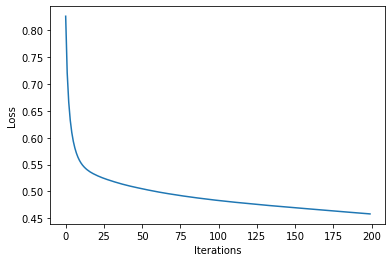

In [ ]:
ann1 = ANN(layersDims)
ann1.fit(X_train, y_train, learning_rate=0.05, n_iterations=2000)
print("Train Accuracy:", ann1.predict(X_train, y_train))
print("Test Accuracy:", ann1.predict(X_test, y_test))
ann1.plot_loss()

For learning_rate = 0.025 and 2000 iterations

Loss:  0.8894058298602097 Train Accuracy: 3.823529411764706
Loss:  0.6213799049941816 Train Accuracy: 52.05882352941177
Loss:  0.5749360137866725 Train Accuracy: 54.55882352941176
Loss:  0.5554752515594532 Train Accuracy: 56.470588235294116
Loss:  0.5440699619592395 Train Accuracy: 56.3235294117647
Loss:  0.536437724115555 Train Accuracy: 57.205882352941174
Loss:  0.5304527176603367 Train Accuracy: 57.205882352941174
Loss:  0.5255752431457457 Train Accuracy: 57.49999999999999
Loss:  0.5209580649949846 Train Accuracy: 58.970588235294116
Loss:  0.5165743777671926 Train Accuracy: 59.55882352941176
Loss:  0.5123418931344716 Train Accuracy: 59.55882352941176
Loss:  0.5081371251480513 Train Accuracy: 60.147058823529406
Loss:  0.5047161504837437 Train Accuracy: 60.29411764705882
Loss:  0.501976315519003 Train Accuracy: 60.588235294117645
Loss:  0.49942043430201627 Train Accuracy: 61.029411764705884
Loss:  0.4971178658959422 Train Accuracy: 60.588235294117645
Loss:  0.4950007425812605 Train Ac

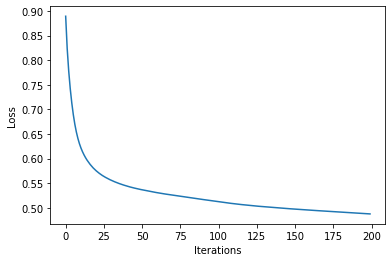

In [ ]:
ann2 = ANN(layersDims)
ann2.fit(X_train, y_train, learning_rate=0.025, n_iterations=2000)
print("Train Accuracy:", ann2.predict(X_train, y_train))
print("Test Accuracy:", ann2.predict(X_test, y_test))
ann2.plot_loss()

For learning_rate = 0.01 and 2000 iterations

Loss:  0.8978652159512719 Train Accuracy: 10.882352941176471
Loss:  0.7668310715262123 Train Accuracy: 42.79411764705882
Loss:  0.6768498407111767 Train Accuracy: 45.44117647058823
Loss:  0.6306080286311405 Train Accuracy: 48.529411764705884
Loss:  0.60545820453922 Train Accuracy: 51.911764705882355
Loss:  0.588090590604366 Train Accuracy: 54.11764705882353
Loss:  0.5745355926247423 Train Accuracy: 56.1764705882353
Loss:  0.5631700664853023 Train Accuracy: 57.35294117647059
Loss:  0.5532891641553535 Train Accuracy: 57.05882352941176
Loss:  0.5452404766236651 Train Accuracy: 58.08823529411765
Loss:  0.538511851513434 Train Accuracy: 58.529411764705884
Loss:  0.5327669493089209 Train Accuracy: 58.235294117647065
Loss:  0.5280805885524511 Train Accuracy: 58.235294117647065
Loss:  0.524307310447532 Train Accuracy: 58.6764705882353
Loss:  0.5210240326360006 Train Accuracy: 59.11764705882353
Loss:  0.5183351734878177 Train Accuracy: 59.26470588235294
Loss:  0.5158907777014808 Train Accuracy:

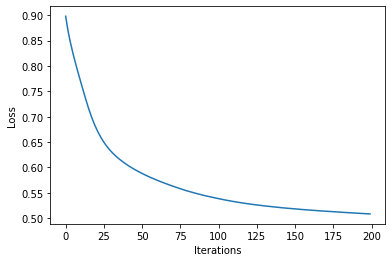

In [ ]:
ann3 = ANN(layersDims)
ann3.fit(X_train, y_train, learning_rate=0.01, n_iterations=2000)
print("Train Accuracy:", ann3.predict(X_train, y_train))
print("Test Accuracy:", ann3.predict(X_test, y_test))
ann3.plot_loss()